In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import pickle
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
Dataset="/content/drive/MyDrive/Signature/BHSig260-Bengali/dataset"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['98', '95', '99', '97', '96', '94', '93', '92', '91', '90', '89', '87', '9', '86', '88', '85', '84', '83', '82', '81', '80', '78', '77', '79', '8', '76', '75', '74', '73', '72', '7', '68', '70', '69', '71', '67', '66', '65', '64', '63', '59', '61', '62', '6', '60', '58', '57', '56', '55', '54', '5', '50', '52', '53', '51', '49', '48', '47', '46', '45', '43', '42', '41', '44', '40', '4', '39', '38', '37', '36', '35', '34', '29', '28', '31', '30', '3', '33', '32', '27', '26', '25', '24', '23', '21', '22', '19', '20', '2', '18', '17', '16', '15', '14', '13', '1', '0', '12', '11', '10']


In [6]:
images = []
classNo = []
classes = 100
epochs_val = 50
batch_size = 32
imageDimensions = (100,360,3)

In [7]:
# Load the saved arrays
X_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Signature/BHSig260-Bengali/Data_3_dim/y_test.npy')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4320, 360, 100, 3) (1080, 360, 100, 3) (4320, 100) (1080, 100)


In [8]:
from keras.applications.vgg16 import VGG16

In [9]:
vgg_16 = VGG16(include_top=False,
                        weights='imagenet',
                        input_shape=[360, 100, 3])

58889256/58889256 [==============================] - 4s 0us/step


In [10]:
def myModel():
    model=Sequential()
    for layer in vgg_16.layers:
        model.add(layer)
    for layer in model.layers:
        layer.trainable=False
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(classes,activation='softmax'))

    #Compilation of the model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [11]:
model = myModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 360, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 360, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 180, 50, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 180, 50, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 180, 50, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 90, 25, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 90, 25, 256)       2

In [12]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs_val, 
                    validation_data=(X_test, y_test))

Epoch 1/50
135/135 [==============================] - 31s 131ms/step - loss: 5.9592 - accuracy: 0.0917 - val_loss: 3.5117 - val_accuracy: 0.1991
Epoch 2/50
135/135 [==============================] - 18s 131ms/step - loss: 2.9041 - accuracy: 0.3250 - val_loss: 2.1914 - val_accuracy: 0.4509
Epoch 3/50
135/135 [==============================] - 16s 118ms/step - loss: 1.7995 - accuracy: 0.5396 - val_loss: 1.3531 - val_accuracy: 0.6398
Epoch 4/50
135/135 [==============================] - 18s 136ms/step - loss: 1.1287 - accuracy: 0.6981 - val_loss: 0.9694 - val_accuracy: 0.7491
Epoch 5/50
135/135 [==============================] - 16s 117ms/step - loss: 0.6971 - accuracy: 0.8120 - val_loss: 0.7907 - val_accuracy: 0.8074
Epoch 6/50
135/135 [==============================] - 16s 116ms/step - loss: 0.5758 - accuracy: 0.8370 - val_loss: 0.7928 - val_accuracy: 0.8019
Epoch 7/50
135/135 [==============================] - 16s 116ms/step - loss: 0.4578 - accuracy: 0.8694 - val_loss: 0.6164 - val_ac

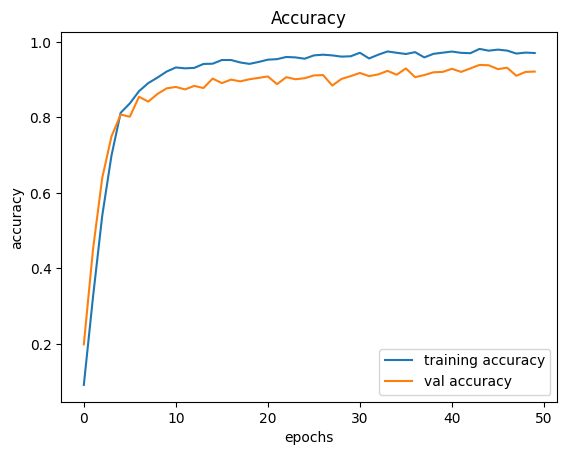

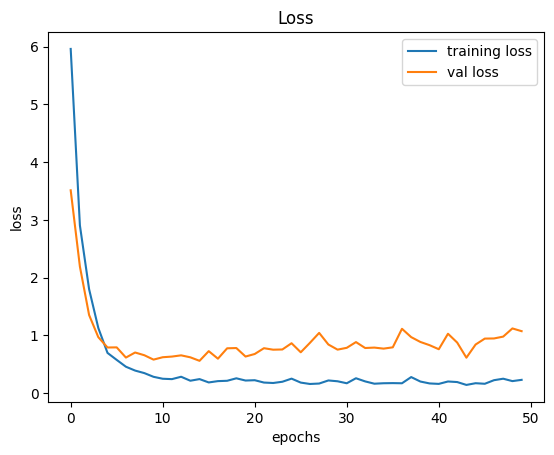

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.9962962865829468


In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9212962985038757


In [16]:
pred = np.argmax(model.predict(X_test), axis = 1)

34/34 [==============================] - 3s 93ms/step


In [17]:
actual=np.argmax(y_test, axis = 1)

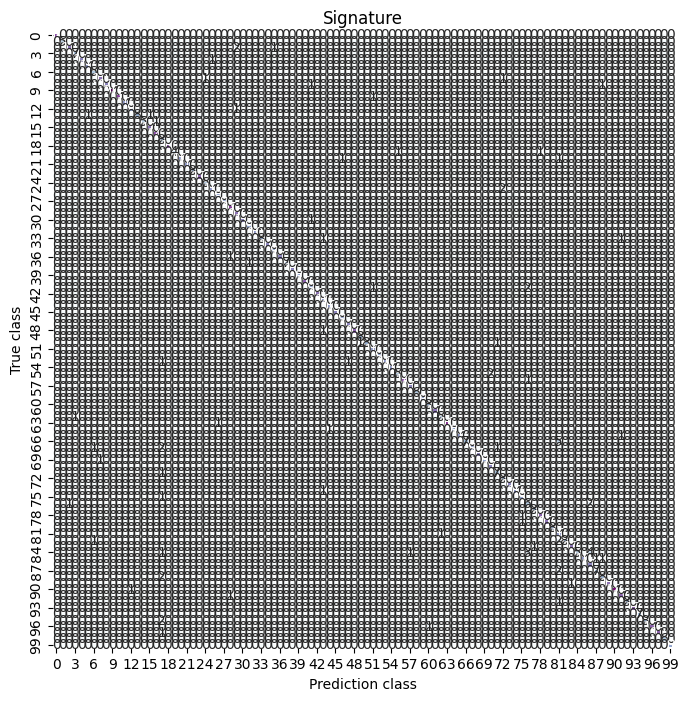

In [18]:
cm = confusion_matrix(actual, pred)
# cm_df = pd.DataFrame(cm)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True,cmap='BuPu',cbar=False,linewidth=2,fmt='d')
plt.title('Signature')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [19]:
cf = classification_report(actual, pred)
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5
           2       0.92      0.80      0.86        15
           3       0.88      1.00      0.93         7
           4       1.00      0.92      0.96        12
           5       0.91      1.00      0.95        10
           6       0.75      1.00      0.86         6
           7       0.92      0.86      0.89        14
           8       1.00      0.85      0.92        13
           9       1.00      1.00      1.00        20
          10       1.00      0.94      0.97        16
          11       1.00      1.00      1.00        10
          12       0.90      0.90      0.90        10
          13       1.00      0.80      0.89        10
          14       1.00      0.83      0.91         6
          15       0.92      1.00      0.96        12
          16       0.93      1.00      0.97        14
          17       0.42    